In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ar

In [7]:
groc_data=pd.read_excel("D:\Aman\Python\groceries.xlsx",header=None)
data = pd.DataFrame(groc_data)
data
# data.fillna(0)# used to do 0 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape #used to see col and row

(9835, 32)

In [9]:
# data.describe() to see count ,etc
# data[0]
# data.dtypes
# data_rows_duplicate=data[data.duplicated()]
# print(data_rows_duplicate)
# data.count()
unique=(data[0].unique())
print(len(unique))

158


In [10]:
encode_vals=[]
# print(set(unique))

for i,r in data.iterrows():
    labels={}
    not_there = list(set(unique) - set(r))
    there = list(set(unique).intersection(r))
    for nt in not_there:
        labels[nt]=0
    for t in there:
        labels[t]=1
    encode_vals.append(labels)
encode_vals[0]
encoded_data=pd.DataFrame(encode_vals)
encoded_data

,kitchen utensil,brown bread,cleaner,specialty chocolate,whipped/sour cream,coffee,organic sausage,newspapers,meat,waffles,...,canned vegetables,zwieback,frozen chicken,bottled beer,fish,photo/film,mayonnaise,margarine,citrus fruit,semi-finished bread
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
# print(data[0])
print(data[0].value_counts().head())

sausage             825
whole milk          717
frankfurter         580
tropical fruit      482
other vegetables    460
Name: 0, dtype: int64


In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,chocolate,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


D:\System\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

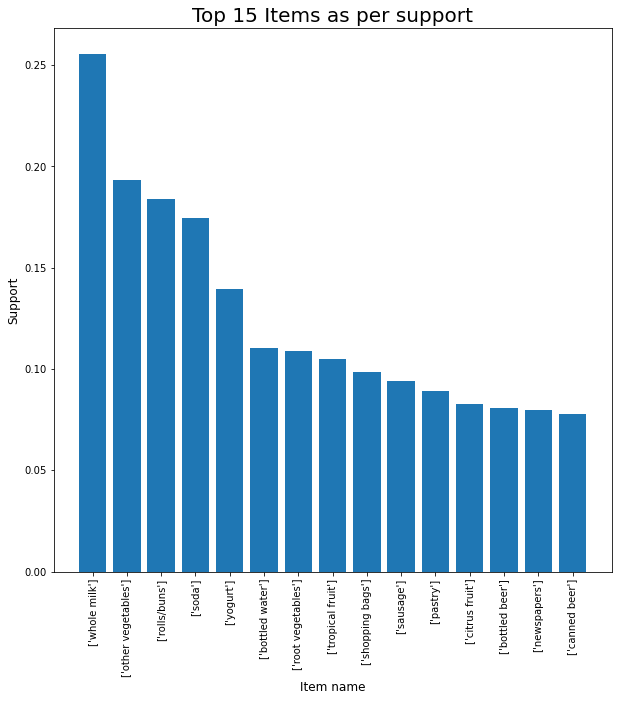

In [8]:
freq_items=ap(encoded_data,min_support=0.007,use_colnames=True)
# freq_items
most_pop_items=freq_items.sort_values('support',ascending=False)
# most_pop_items
most_pop_items=most_pop_items.head(15)

for i in range (len(most_pop_items.itemsets)):
    most_pop_items.itemsets.iloc[i]=str(list(most_pop_items.itemsets.iloc[i]))

fig=plt.figure(figsize=(10,10))
grph=fig.add_subplot(111)
grph.bar(most_pop_items.itemsets,most_pop_items.support)
for label in grph.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.title('Top 15 Items as per support',fontsize=20)
plt.xlabel('Item name',fontsize=12)
plt.ylabel('Support',fontsize=12)

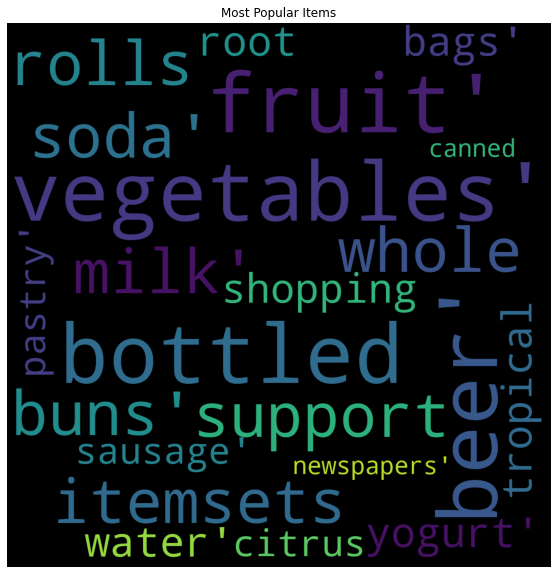

In [22]:
import seaborn as sns
from wordcloud import WordCloud

plt.rcParams['figure.figsize']=(10,10)
wordcloud=WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(str(most_pop_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items')
plt.show()

In [25]:
association_confi=ar(freq_items,metric='confidence',min_threshold=0.2)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
249,"(yogurt, butter)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648
356,"(root vegetables, butter)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423
469,"(yogurt, tropical fruit, other vegetables)",(whole milk),0.007626,0.619835,2.425816,0.004482,1.958317
463,"(root vegetables, yogurt, other vegetables)",(whole milk),0.007829,0.606299,2.372842,0.004530,1.890989
313,"(root vegetables, domestic eggs)",(whole milk),0.008541,0.595745,2.331536,0.004878,1.841618
384,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,0.006948,1.949059
472,"(root vegetables, whole milk, tropical fruit)",(other vegetables),0.007016,0.584746,3.022057,0.004694,1.942201
378,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,0.008231,1.941244
264,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125,0.005649,1.782567
352,"(root vegetables, pip fruit)",(whole milk),0.008948,0.575163,2.250988,0.004973,1.752401


In [26]:
association_supp=ar(freq_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head(20)


,antecedents,consequents,support,confidence,lift,leverage,conviction
4,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
5,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
0,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157
1,(yogurt),(whole milk),0.056024,0.401603,1.571735,0.020379,1.244132


In [27]:
association_lift=ar(freq_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(20)


,antecedents,consequents,support,confidence,lift,leverage,conviction
63,"(root vegetables, tropical fruit)","(whole milk, other vegetables)",0.007016,0.333333,4.454257,0.005441,1.387748
66,"(whole milk, other vegetables)","(root vegetables, tropical fruit)",0.007016,0.093750,4.454257,0.005441,1.080224
52,"(whole milk, tropical fruit)","(yogurt, other vegetables)",0.007626,0.180288,4.152546,0.005789,1.166976
57,"(yogurt, other vegetables)","(whole milk, tropical fruit)",0.007626,0.175644,4.152546,0.005789,1.161758
46,"(root vegetables, yogurt)","(whole milk, other vegetables)",0.007829,0.303150,4.050919,0.005896,1.327638
47,"(whole milk, other vegetables)","(root vegetables, yogurt)",0.007829,0.104620,4.050919,0.005896,1.088000
67,"(tropical fruit, other vegetables)","(root vegetables, whole milk)",0.007016,0.195467,3.996720,0.005260,1.182168
62,"(root vegetables, whole milk)","(tropical fruit, other vegetables)",0.007016,0.143451,3.996720,0.005260,1.125572
0,(root vegetables),(herbs),0.007016,0.064366,3.956477,0.005243,1.051406
1,(herbs),(root vegetables),0.007016,0.431250,3.956477,0.005243,1.566596


In [16]:
file = pd.ExcelWriter('Desktop\confidence_based.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(30).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()